In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/38-615/Final_Project/dielectron.csv')
df

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,-1,2.74718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,146511,522575834,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779
99996,146511,522786431,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540
99997,146511,522906124,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350
99998,146511,523243830,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670


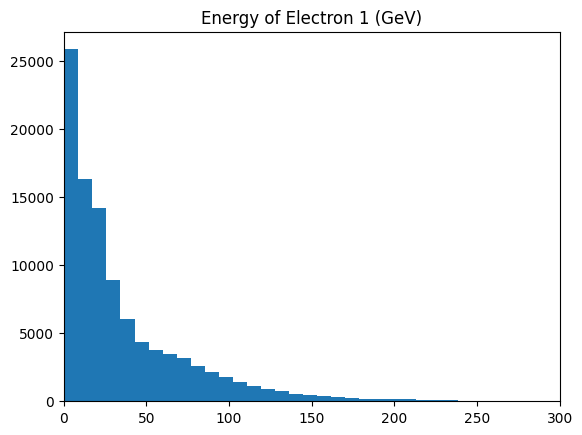

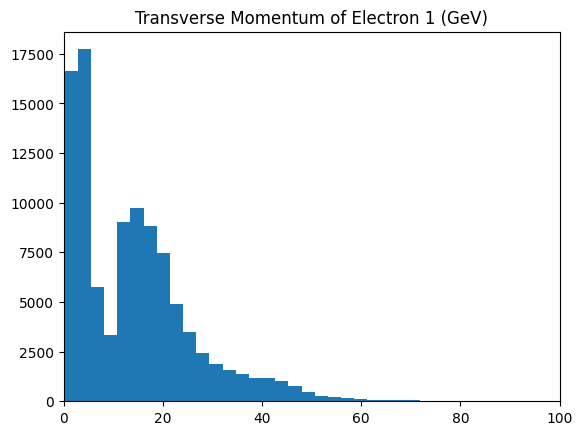

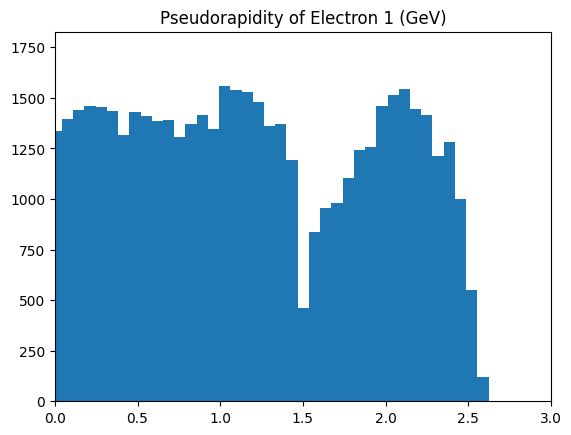

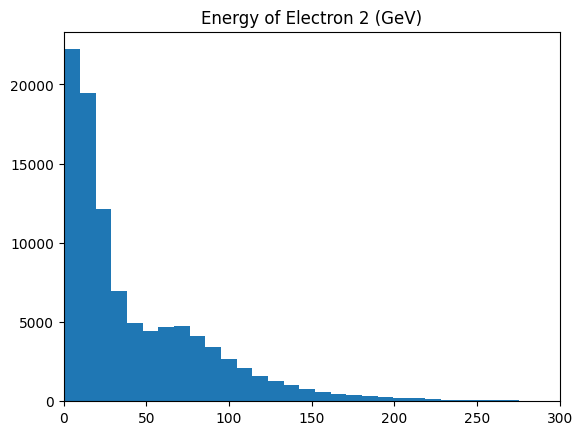

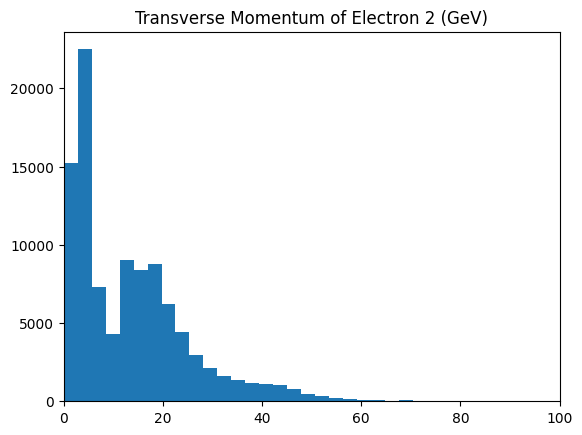

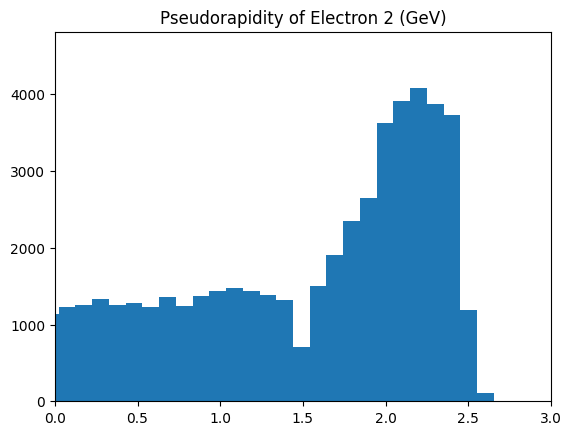

In [ ]:
plt.hist(df['E1'], bins = 100)
plt.xlim(0, 300)
plt.title('Energy of Electron 1 (GeV)')
plt.show()


plt.hist(df['pt1'], bins = 100)
plt.xlim(0, 100)
plt.title('Transverse Momentum of Electron 1 (GeV)')
plt.show()

plt.hist(df['eta1'], bins = 100)
plt.xlim(0, 3)
plt.title('Pseudorapidity of Electron 1 (GeV)')
plt.show()

plt.hist(df['E2'], bins = 100)
plt.xlim(0, 300)
plt.title('Energy of Electron 2 (GeV)')
plt.show()

plt.hist(df['pt2'], bins = 100)
plt.xlim(0, 100)
plt.title('Transverse Momentum of Electron 2 (GeV)')
plt.show()

plt.hist(df['eta2'], bins = 100)
plt.xlim(0, 3)
plt.title('Pseudorapidity of Electron 2 (GeV)')
plt.show()



In [ ]:
df.drop(["Event"], axis=1, inplace=True)
df.isna().sum()

,0
Run,0
E1,0
px1,0
py1,0
pz1,0
pt1,0
eta1,0
phi1,0
Q1,0
E2,0


In [ ]:
df.dropna(inplace = True)
y = df['M']
X = df.drop('M', axis=1)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=90125)

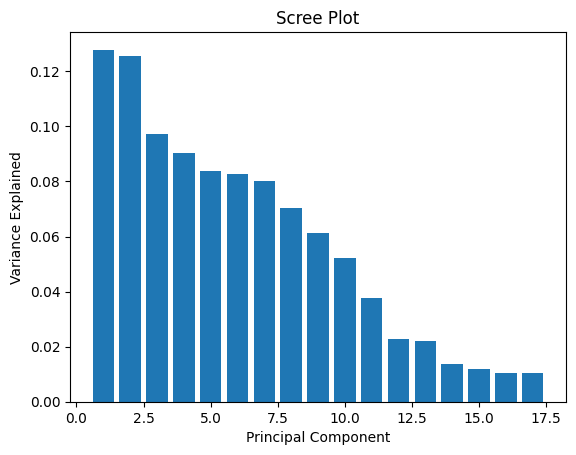

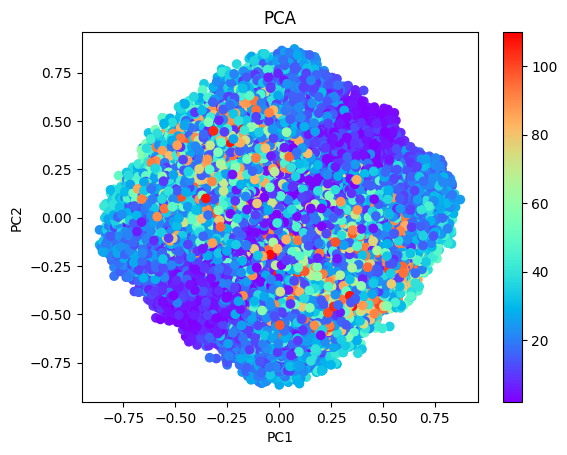

In [ ]:
#We visualize the data using PCA:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(train_X)
df_norm = normalize(df_scaled)
df_norm = pd.DataFrame(df_norm)

pca = PCA(n_components = 17)
df_prin = pca.fit_transform(df_norm)
df_prin = pd.DataFrame(df_prin)


plt.bar(np.linspace(1,len(pca.explained_variance_ratio_),len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

plt.scatter(df_prin[0], df_prin[1], c=train_y, cmap='rainbow')
plt.colorbar()
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

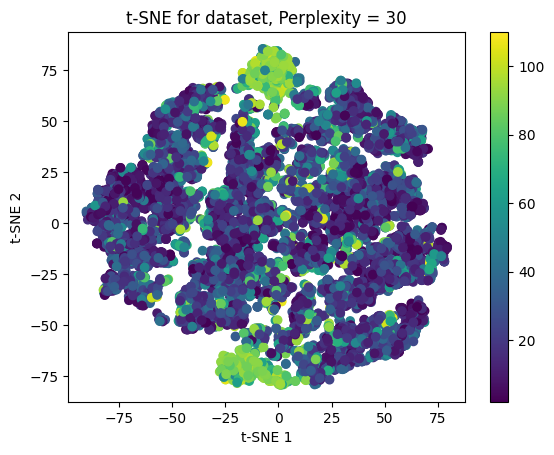

In [ ]:
#We now use t-SNE to visualize:

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity = 30)
df_scaled = StandardScaler().fit_transform(train_X)
df_scaled = df_scaled[:10000]
df_tsne = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(df_tsne)
df_tsne.columns = ['T1', 'T2']

plt.scatter(df_tsne['T1'], df_tsne['T2'], c=train_y[:10000], cmap='viridis')
plt.title('t-SNE for dataset, Perplexity = 30')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]
import umap
import umap.plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.8 MB/s eta 0:00:00


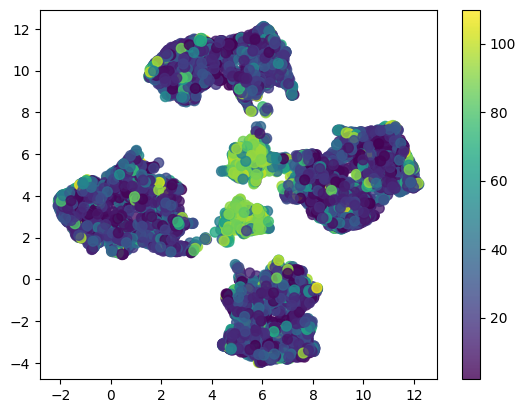

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(train_X)
df_norm = normalize(df_scaled)
df_norm = pd.DataFrame(df_norm)
reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1, n_components=2)
X_embedded = reducer.fit_transform(df_norm.head(10000))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=np.array(train_y.head(10000)), cmap='viridis', s=50, alpha=0.8)
plt.colorbar()

In [ ]:
model = LinearRegression().fit(train_X, train_y)
model.score(test_X, test_y)

0.40409735001796676

In [ ]:
model = RandomForestRegressor(random_state=3498).fit(train_X, train_y)
model.score(test_X, test_y)

0.9455722399731834

In [ ]:
model = DecisionTreeRegressor(random_state=3498).fit(train_X, train_y)
model.score(test_X, test_y)

0.8256625873341226

In [ ]:
model = KNeighborsRegressor().fit(train_X, train_y)
model.score(test_X, test_y)

0.8549731892230648

In [ ]:
model = XGBRegressor(random_state=3498).fit(train_X, train_y)
model.score(test_X, test_y)

0.9798195123831718

In [ ]:
model = LGBMRegressor(random_state=9).fit(train_X, train_y)
model.score(test_X, test_y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 79932, number of used features: 17
[LightGBM] [Info] Start training from score 30.099905


0.9538436599955953

In [ ]:
model = GradientBoostingRegressor(random_state=3498).fit(train_X, train_y)
model.score(test_X, test_y)

0.7880023734265263

In [ ]:
#create model pipeline to test general model fitness/performance
models = [
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('random_forest', RandomForestRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('svr', SVR()),
    ('xgboost', XGBRegressor()),
    ('lightgbm', LGBMRegressor()),
    ('decision_tree', DecisionTreeRegressor()),
    ('knn', KNeighborsRegressor()),
    ('linear_regression', LinearRegression()),
]

pipelines = {name: Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', model)
]) for name, model in models}

# Evaluate each model
for name, pipeline in pipelines.items():
    pipeline.fit(train_X, train_y)
    pred_y = pipeline.predict(test_X)
    score = r2_score(test_y, pred_y)
    print(f"{name}: R-squared = {score}")

ridge: R-squared = 0.40409718381690907
lasso: R-squared = 0.3999746714541135
random_forest: R-squared = 0.945553780229039
gradient_boosting: R-squared = 0.7880043268773942
svr: R-squared = 0.957841845459734
xgboost: R-squared = 0.9798195123831718
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 79932, number of used features: 17
[LightGBM] [Info] Start training from score 30.099905
lightgbm: R-squared = 0.9557401979574931
decision_tree: R-squared = 0.8236769874170744
knn: R-squared = 0.8858189565447525
linear_regression: R-squared = 0.40409735001796676


In [ ]:
#lgbm was the best performing model, gridsearch on this model first.

lgbm = LGBMRegressor(random_state=42)

# Define parameter grid for lgbm regressor
param_grid = {'n_estimators': [50, 100, 500],  'learning_rate': [0.01, 0.1, 0.2, 0.3]}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='r2', verbose=10, n_jobs = -1, cv=2)
grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Mean Squared Error: {r2}")

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 79932, number of used features: 17
[LightGBM] [Info] Start training from score 30.099905
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 500}
Test Set Mean Squared Error: 0.9902184117908954


In [ ]:
#Lasso regression gridsearch

lasso = Lasso(random_state=100)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 5000, 10000]}

#gridsearh for Lasso Regression
grid_search = GridSearchCV(estimator=lasso,param_grid=param_grid,scoring='r2',  cv=5, verbose=10,  n_jobs=-10)

grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Mean Squared Error: {r2}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START alpha=0.001, max_iter=1000.................................
[CV 1/5; 1/18] END ..alpha=0.001, max_iter=1000;, score=0.403 total time=   2.0s
[CV 2/5; 1/18] START alpha=0.001, max_iter=1000.................................
[CV 2/5; 1/18] END ..alpha=0.001, max_iter=1000;, score=0.403 total time=   2.7s
[CV 3/5; 1/18] START alpha=0.001, max_iter=1000.................................
[CV 3/5; 1/18] END ..alpha=0.001, max_iter=1000;, score=0.402 total time=   1.5s
[CV 4/5; 1/18] START alpha=0.001, max_iter=1000.................................
[CV 4/5; 1/18] END ..alpha=0.001, max_iter=1000;, score=0.412 total time=   0.4s
[CV 5/5; 1/18] START alpha=0.001, max_iter=1000.................................
[CV 5/5; 1/18] END ..alpha=0.001, max_iter=1000;, score=0.399 total time=   0.8s
[CV 1/5; 2/18] START alpha=0.001, max_iter=5000.................................
[CV 1/5; 2/18] END ..alpha=0.001, max_iter=5000;

In [ ]:
#Ridge regression

ridge = Ridge(random_state=42)

#parameter grid for ridge regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  'max_iter': [1000, 5000, 10000]}

grid_search = GridSearchCV( estimator=ridge,param_grid=param_grid,scoring='r2',  cv=5, verbose=10,   n_jobs=-1)

grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Mean Squared Error: {r2}")

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best Parameters: {'alpha': 1000, 'max_iter': 1000}
Test Set Mean Squared Error: 0.40409852438254146


In [ ]:
#Random Forest Regression

rf = RandomForestRegressor(random_state=42)

#parameter grid for random forest regression
param_grid = {'n_estimators': [50, 100, 200],  'max_depth': [None, 10, 20, 30]}

grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,scoring='r2', cv=2,verbose=10,n_jobs=-1 )

grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Mean Squared Error: {r2}")

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Test Set Mean Squared Error: 0.9458544631232747


In [ ]:
#Gradient Boosting Regression

gbr = GradientBoostingRegressor(random_state=42)

# Parameter grid for Gradient Boosting Regression
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2] }

# Set up GridSearchCV
grid_search = GridSearchCV( estimator=gbr,param_grid=param_grid,scoring='r2', cv=2, verbose=10, n_jobs=-1)

grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Mean Squared Error: {r2}")

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Test Set Mean Squared Error: 0.9447738585443444


In [ ]:
#Support Vector Regression
svr = SVR()

#Parameter grid for support vector regression
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=svr,param_grid=param_grid,scoring='r2', cv=2, verbose=10, n_jobs=-1)

grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Mean Squared Error: {r2}")

Fitting 2 folds for each of 20 candidates, totalling 40 fits


In [ ]:
#xgboost regression

xgb = XGBRegressor(random_state=42, objective='reg:squarederror', eval_metric='rmse')

# Parameter grid for xgboost regression
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}

grid_search = GridSearchCV( estimator=xgb,param_grid=param_grid,scoring='r2', cv=2, verbose=10, n_jobs=-1)

grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Mean Squared Error: {r2}")

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 300}
Test Set Mean Squared Error: 0.986109026098906


In [91]:
#decision tree regression

dtr = DecisionTreeRegressor(random_state=42)

# Gridsearch for decision tree regression
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_features': [None, 'sqrt', 'log2']}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dtr,param_grid=param_grid,scoring='r2', cv=2, verbose=10, n_jobs=-1)

grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Mean Squared Error: {r2}")

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best Parameters: {'criterion': 'friedman_mse', 'max_features': 'sqrt'}
Test Set Mean Squared Error: 0.8780380137706305


In [93]:
#k-nearest neighbors regression

knn = KNeighborsRegressor()

# Paramter grid for k-nearest neighbors regression
param_grid = {'n_neighbors': [5, 10, 15], 'metric': ['euclidean', 'manhattan', 'minkowski']}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn,param_grid=param_grid,scoring='r2', cv=2, verbose=10, n_jobs=-1)

grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Mean Squared Error: {r2}")

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Test Set Mean Squared Error: 0.863972927976729


In [94]:
#linear

lin = LinearRegression()

lin.fit(train_X, train_y)
pred_y = lin.predict(test_X)
r2 = r2_score(test_y, pred_y)

print(f"Test Set Mean Squared Error: {r2}")

Test Set Mean Squared Error: 0.40409735001796676
